In [3]:
!pip install catboost

In [4]:
!pip install utils

In [5]:
import utils
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


check for **Null** values.

In [9]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Plot Features that have Nulls to decide which stratgy do we use

### Age

In [11]:
titanic_train.Age.nunique()

88

<Axes: xlabel='Age', ylabel='Count'>

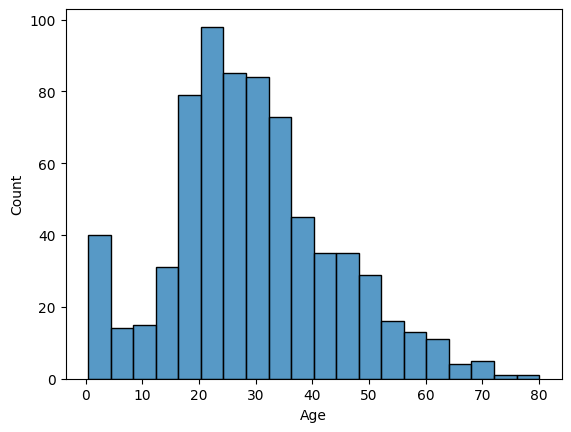

In [12]:
sns.histplot(titanic_train.Age)

Fill Null values

In [14]:

titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()
print(titanic_train.Age.isna().sum())

0


<ipython-input-14-3f839eca2f34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()


In [15]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cabin

In [16]:
titanicdata=titanic_train.drop(['Cabin'],axis=1)

### Embarked

In [17]:
titanicdata.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked', ylabel='Count'>

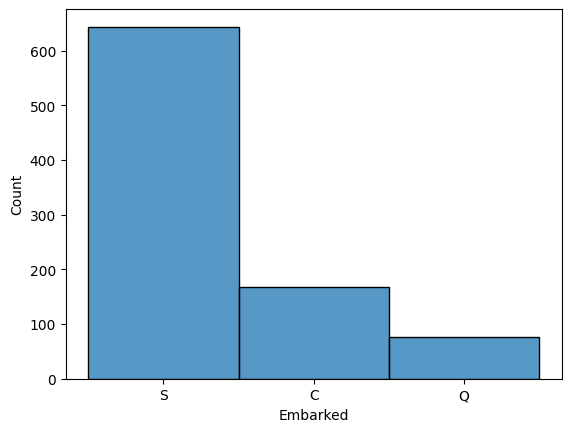

In [18]:
sns.histplot(titanicdata.Embarked)

In [19]:
titanicdata.Embarked.mode()

0    S
Name: Embarked, dtype: object

Fill Null values

In [20]:

titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]
print(titanicdata.Embarked.isna().sum())


0


<ipython-input-20-3927d922becd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]


### Remove Features that is useless

In [21]:
titanicdata = titanicdata.drop(['PassengerId','Name','Ticket'],axis=1)


### Apply One-Hot-Encoding to Categorical Features

In [22]:

encoded_data=pd.get_dummies(titanicdata,columns=['Sex','Embarked'])


In [23]:
encoded_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


### **OR** Ordinal encoding

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(titanicdata)
ordinal_encoded = enc.transform(titanicdata)
ordinal_encoded


array([[  0.,   2.,   1., ...,   0.,  18.,   2.],
       [  1.,   0.,   0., ...,   0., 207.,   0.],
       [  1.,   2.,   0., ...,   0.,  41.,   2.],
       ...,
       [  0.,   2.,   0., ...,   2., 131.,   2.],
       [  1.,   0.,   1., ...,   0., 153.,   0.],
       [  0.,   2.,   1., ...,   0.,  30.,   1.]])

### Split Data into X,Y

In [25]:

X = encoded_data.drop('Survived',axis=1)
Y = encoded_data['Survived']

### Split Train Data into Train and Validation sets

In [26]:
Xtrain,Xval, Ytrain,Yval= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [27]:
Xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
692,3,29.699118,0,0,56.4958,0,1,0,0,1
481,2,29.699118,0,0,0.0000,0,1,0,0,1
527,1,29.699118,0,0,221.7792,0,1,0,0,1
855,3,18.000000,0,1,9.3500,1,0,0,0,1
801,2,31.000000,1,1,26.2500,1,0,0,0,1


In [28]:
Ytrain.head()

692    1
481    0
527    0
855    1
801    1
Name: Survived, dtype: int64

### Decision Tree Classifier

In [41]:
DTC = DecisionTreeClassifier(criterion = "entropy",max_depth=6,random_state=42)
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

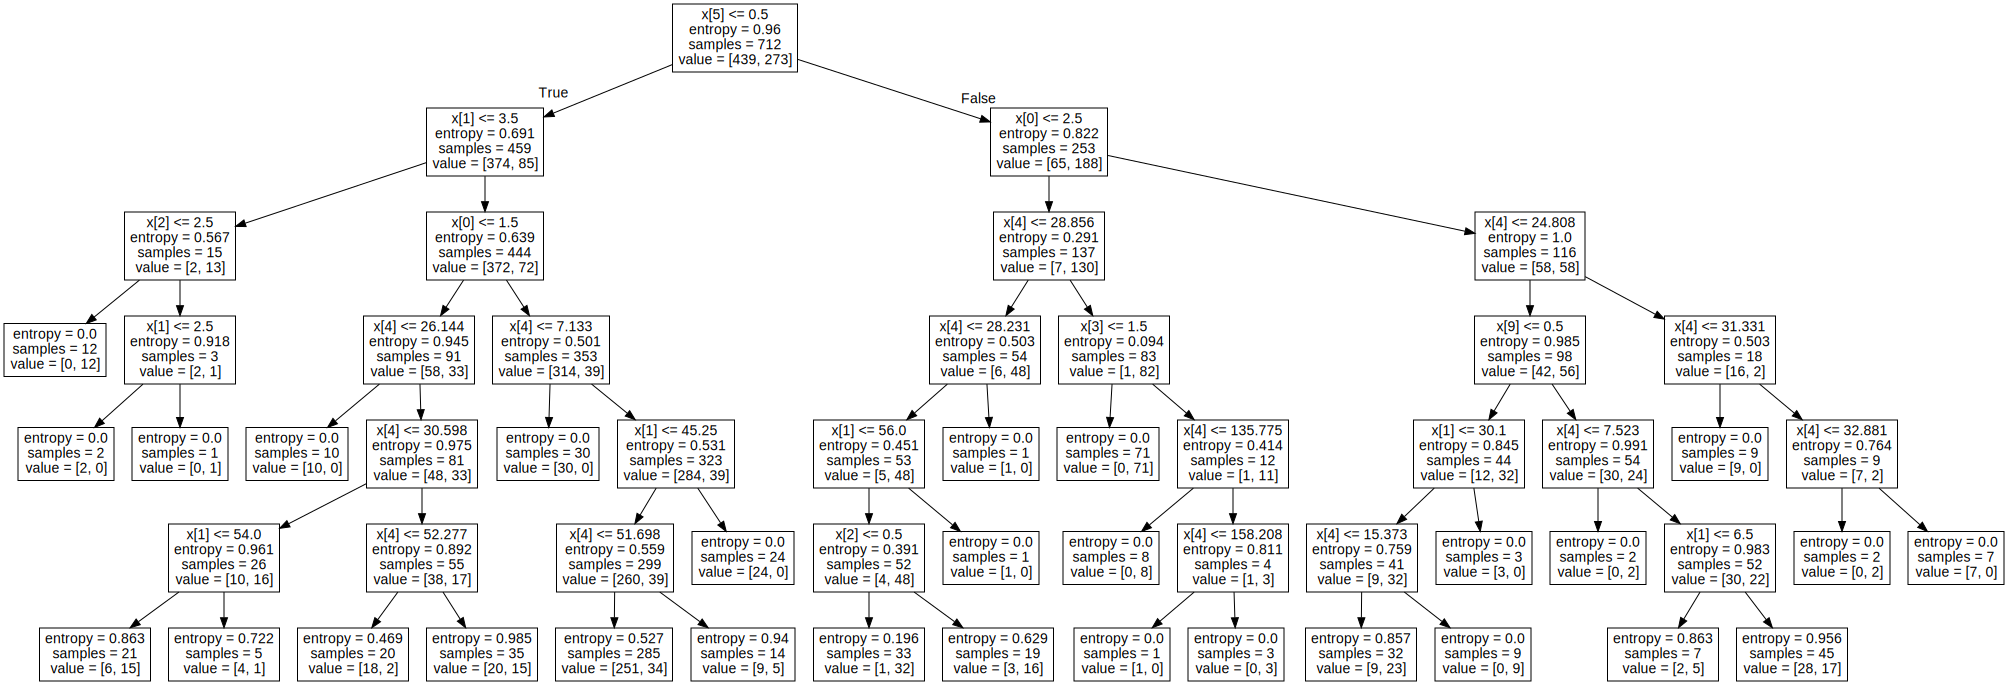

In [42]:
import graphviz
dot_data=tree.export_graphviz(DTC)
graph = graphviz.Source(dot_data, format="png")
graph

In [43]:
Ypredict = DTC.predict(Xval)
accuracy_score(Yval,Ypredict)

0.7932960893854749

In [44]:
y_train_predict=DTC.predict(Xtrain)
y_test_predict=DTC.predict(Xval)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(Ytrain,y_train_predict)
test_acc=accuracy_score(Yval,y_test_predict)
print("training acc = ",train_acc)
print("test acc = ",test_acc)

training acc =  0.8665730337078652
test acc =  0.7932960893854749


**Grid Search**

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

def get_grid_search():


    params = {
        "criterion": ['gini', 'entropy'],
        "max_depth": list(np.arange(1,15)),
        "min_samples_leaf": list(np.arange(2, 10)),
        "min_samples_split": list(np.arange(2,10))
             }


    grid = GridSearchCV(DTC, params, scoring='accuracy')

    grid.fit(Xtrain, Ytrain)

    print(grid.best_estimator_)
get_grid_search()

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       random_state=42)


i use another depth


In [50]:
def predictions():
    clf = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_train_predict=clf.predict(Xtrain)
    y_test_predict=clf.predict(Xval)
    from sklearn.metrics import accuracy_score
    train_acc=accuracy_score(Ytrain,y_train_predict)
    test_acc=accuracy_score(Yval,y_test_predict)
    print("training acc = ",train_acc)
    print("test acc = ",test_acc)
predictions()

training acc =  0.8834269662921348
test acc =  0.770949720670391


[Text(0.4268292682926829, 0.9285714285714286, 'x[5] <= 0.5\nentropy = 0.96\nsamples = 712\nvalue = [439, 273]'),
 Text(0.1524390243902439, 0.7857142857142857, 'x[1] <= 3.5\nentropy = 0.691\nsamples = 459\nvalue = [374, 85]'),
 Text(0.04878048780487805, 0.6428571428571429, 'x[2] <= 2.5\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.024390243902439025, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.07317073170731707, 0.5, 'x[1] <= 2.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.04878048780487805, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0975609756097561, 0.35714285714285715, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25609756097560976, 0.6428571428571429, 'x[0] <= 1.5\nentropy = 0.639\nsamples = 444\nvalue = [372, 72]'),
 Text(0.17073170731707318, 0.5, 'x[4] <= 26.144\nentropy = 0.945\nsamples = 91\nvalue = [58, 33]'),
 Text(0.14634146341463414, 0.35714285714285715, 'entropy = 0.0\nsamples = 10\nvalue 

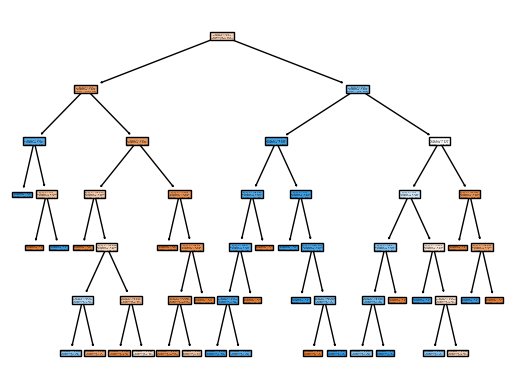

In [48]:
tree.plot_tree(DTC,filled=True)

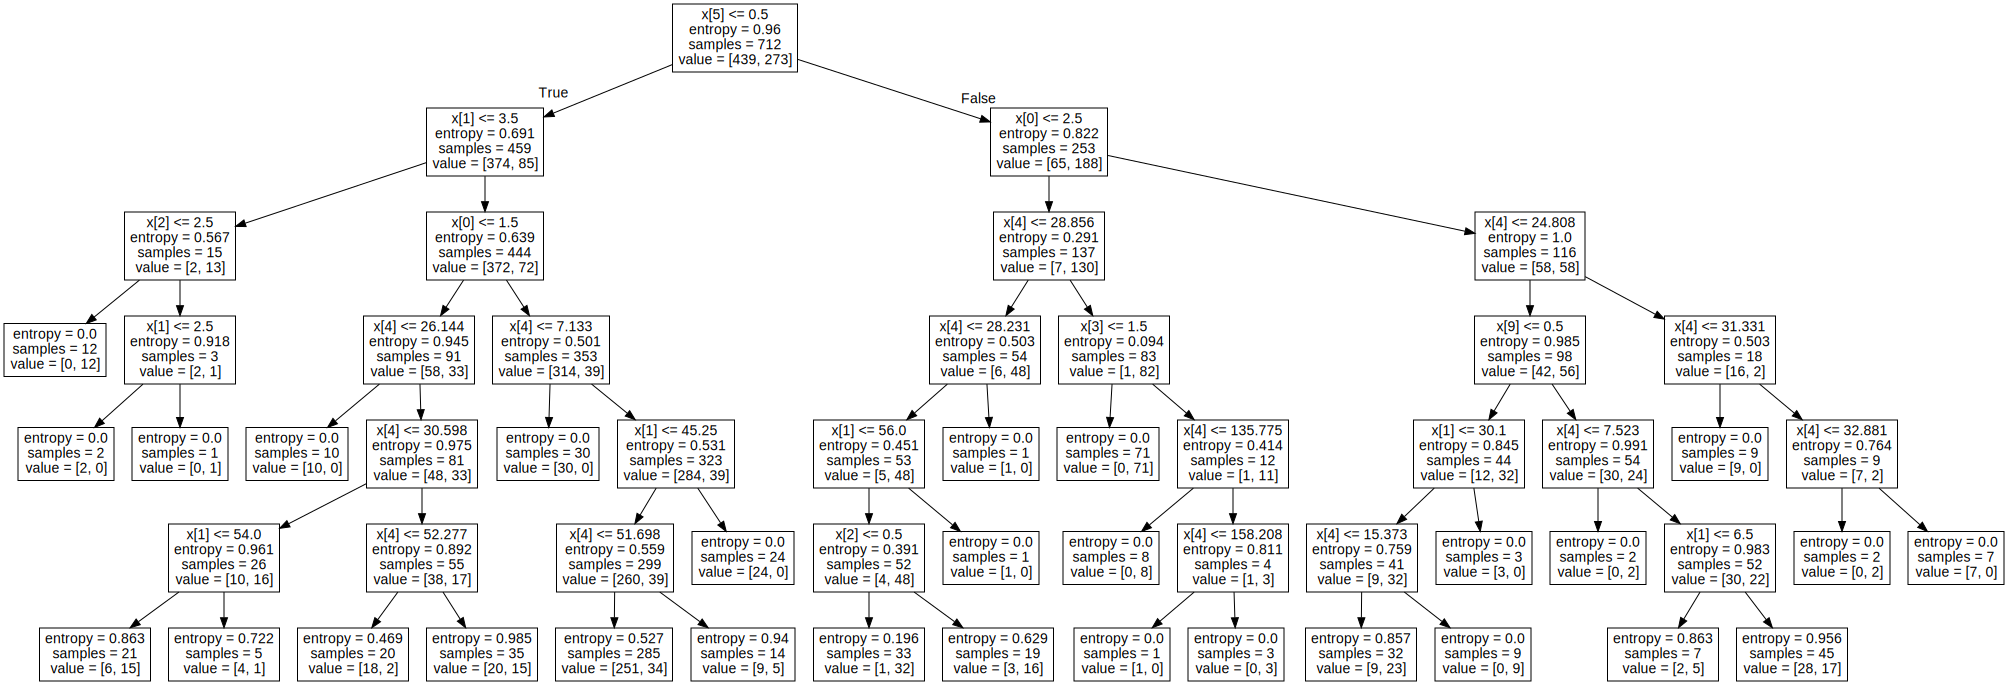

In [49]:
import graphviz
dot_data=tree.export_graphviz(DTC)
graph = graphviz.Source(dot_data, format="png")
graph